In [1]:
import os

os.environ["http_proxy"] = "http://proxy50.adm.toyota.co.jp:15520"
os.environ["https_proxy"] = "http://proxy50.adm.toyota.co.jp:15520"

In [2]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [3]:
device = "cuda"
model_path = "stabilityai/stable-diffusion-2-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

#safety checker外す
# def null_safety(images, **kwargs):
#     return images, False
 
# pipe.safety_checker = null_safety

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

In [4]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def read_image(path):
    return PIL.Image.open(path).convert("RGB")

In [17]:
image = read_image("./image/image.png")
mask_image = read_image("./image/mask2.png")

  0%|          | 0/51 [00:00<?, ?it/s]

1266730287


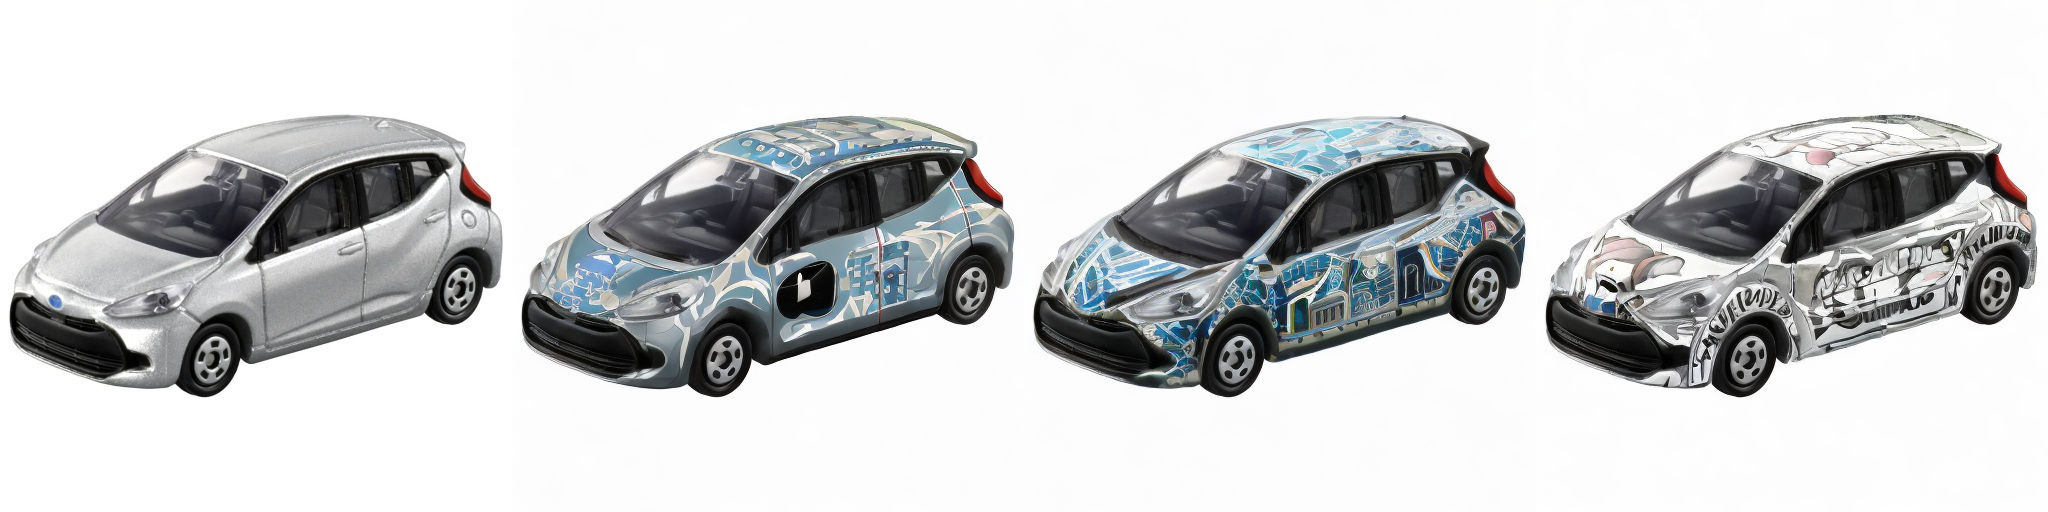

In [19]:
import random

prompt = "red car"
guidance_scale=3
num_samples = 3
randomseed = random.randint(0, 1e10)
generator = torch.Generator(device="cuda").manual_seed(randomseed)

from torch import autocast
with autocast("cuda"):
    images = pipe(
    prompt=prompt,
    image=image,
    strength = 1,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
    ).images

# insert initial image in the list so we can compare side by side
images.insert(0, image)
print(randomseed)
image_grid(images, 1, num_samples + 1)